<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-Bias-and-Variance" data-toc-modified-id="Model-Bias-and-Variance-1">Model Bias and Variance</a></span></li><li><span><a href="#The-Bias-Variance-Decomposition" data-toc-modified-id="The-Bias-Variance-Decomposition-2">The Bias-Variance Decomposition</a></span></li><li><span><a href="#Example:-Linear-Regression-and-Sine-Waves" data-toc-modified-id="Example:-Linear-Regression-and-Sine-Waves-3">Example: Linear Regression and Sine Waves</a></span></li><li><span><a href="#Bias-Variance-In-Practice" data-toc-modified-id="Bias-Variance-In-Practice-4">Bias-Variance In Practice</a></span></li><li><span><a href="#Takeaways" data-toc-modified-id="Takeaways-5">Takeaways</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6">Summary</a></span></li></ul></div>

In [1]:
# HIDDEN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

In [2]:
# HIDDEN
def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]
    if len(df.columns) <= ncols:
        interact(peek, row=(0, len(df) - nrows, nrows), col=fixed(0))
    else:
        interact(peek,
                 row=(0, len(df) - nrows, nrows),
                 col=(0, len(df.columns) - ncols))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

## Model Bias and Variance

We have previously seen that our choice of model has two basic sources of error.

Our model may be too simple—a linear model is not able to properly fit data generated from a quadratic process, for example. This type of error arises from model **bias**.

Our model may also fit the random noise present in the data—even if we fit a quadratic process using a quadratic model, the model may predict different outcomes than the true process produces. This type of error arises from model **variance**.

## The Bias-Variance Decomposition

We can make the statements above more precise by decomposing our formula for model risk. Recall that the **risk** for a model $ f_\hat{\theta} $ is the expected loss for all possible sets of training data $ X $, $ y $ and all input-output points $ z$, $ \gamma $ in the population:

$$
\begin{aligned}
R(f_\hat{\theta}) = \mathbb{E}[ \ell(\gamma, f_\hat{\theta} (z)) ]
\end{aligned}
$$

We denote the process that generates the true population data as $ h(x) $. Our observed outcomes $ \gamma $ were generated by our population process plus some random noise in data collection: $ \gamma_i = h(z_i) + \epsilon $.  The random noise $ \epsilon $ is a random variable with a mean of zero: $ \mathbb{E}[\epsilon] = 0 $.

If we use the squared error as our loss function, the above expression becomes:

$$
\begin{aligned}
R(f_\hat{\theta}) = \mathbb{E}[ (\gamma - f_\hat{\theta} (z))^2 ]
\end{aligned}
$$

With some algebraic manipulation, we can show that the above expression is equivalent to:

$$
\begin{aligned}
R(f_\hat{\theta}) = (\mathbb{E}[f_\hat{\theta}(z)] - f_\theta(z))^2 + \text{Var}(f_\hat{\theta}(z)) + \text{Var}(\epsilon)
\end{aligned}
$$

The first term in this expression, $ (\mathbb{E}[f_\hat{\theta}(z)] - f_\theta(z))^2 $, is a mathematical expression for the bias of the model. (Technically, this term represents the bias squared, $\text{bias}^2$.) The bias is equal to zero if in the long run our choice of model $ f_\hat{\theta}(z) $ predicts the same outcomes produced by the population process $ f_\theta(z) $. The bias is high if our choice of model makes poor predictions of the population process even when we have the entire population as our dataset.

The second term in this expression, $ \text{Var}(f_\hat{\theta}(z)) $, represents the model variance. The variance is low when the model's predictions don't change much when the model is trained on different datasets from the population. The variance is high when the model's predictions change greatly when the model is trained on different datasets from the population.

The third and final term in this expression, $ \text{Var}(\epsilon) $, represents the irreducible error or the noise in the data generation and collection process. This term is small when the data generation and collection process is precise or has low variation. This term is large when the data contain large amounts of noise.

To begin the decomposition, we start with the mean squared error

$$\mathbb{E}[(\gamma - f_{\hat{\theta}}(z))^2]$$

and square the inside term and apply linearity of expectation:

$$ =\mathbb{E}[\gamma^2 -2\gamma f_{\hat{\theta}} +f_\hat{\theta}(z)^2]$$  
$$= \mathbb{E}[\gamma^2] - \mathbb{E}[2\gamma f_{\hat{\theta}}(z)] + \mathbb{E}[f_{\hat{\theta}}(z)^2]$$

Because $ \gamma $ and $f_{\hat{\theta}}(z)$ are independent (the model outputs and population observations don't depend on each other), we can say that $\mathbb{E}[2\gamma f_{\hat{\theta}}(z)] = \mathbb{E}[2\gamma]  \mathbb{E}[f_{\hat{\theta}}(z)] $. We then substitute $h(z) + \epsilon$ for $\gamma$:

$$ =\mathbb{E}[(h(z) + \epsilon)^2] - \mathbb{E}[2(h(z) + \epsilon)] \mathbb{E}[f_{\hat{\theta}}(z)] + \mathbb{E}[f_{\hat{\theta}}(z)^2]$$          

Simplifiying some more: (Note that $\mathbb{E}[h(z)] = h(z)$ because $h(z)$ is a deterministic function, given a particular query point $ z $.)   


$$ =\mathbb{E}[h(z)^2 + 2h(z) \epsilon + \epsilon^2] - (2h(z) + \mathbb{E}[2\epsilon]) \mathbb{E}[f_{\hat{\theta}}(z)] + \mathbb{E}[f_{\hat{\theta}}(z)^2]$$ 

Applying linearity of expectation again:

$$= h(z)^2 + 2h(z)\mathbb{E}[\epsilon] + \mathbb{E}[\epsilon^2] - (2h(z) + 2\mathbb{E}[\epsilon]) \mathbb{E}[f_{\hat{\theta}}(z)] + \mathbb{E}[f_{\hat{\theta}}(z)^2]$$   

Noting that $\big( \mathbb{E}[\epsilon] = 0 \big) => \big( \mathbb{E}[\epsilon^2] = \text{Var}(\epsilon) \big)$ because $\text{Var}(\epsilon) = \mathbb{E}[\epsilon^2]-\mathbb{E}[\epsilon]^2$:

$$ = h(z)^2 + \text{Var}(\epsilon) - 2h(z) \mathbb{E}[f_{\hat{\theta}}(z)] + \mathbb{E}[f_{\hat{\theta}}(z)^2]$$           

We can then rewrite the equation as:

$$ = h(z)^2 + \text{Var}(\epsilon) - 2h(z) \mathbb{E}[f_{\hat{\theta}}(z)] + \mathbb{E}[f_{\hat{\theta}}(z)^2] -  \mathbb{E}[f_{\hat{\theta}}(z)]^2 + \mathbb{E}[f_{\hat{\theta}}(z)]^2$$

Because $ \mathbb{E}[f_{\hat{\theta}}(z)^2] -  \mathbb{E}[f_{\hat{\theta}}(z)]^2 = Var(f_{\hat{\theta}}(z))$:

$$ =  h(z)^2 - 2h(z) \mathbb{E}[f_{\hat{\theta}}(z)] + \mathbb{E}[f_{\hat{\theta}}(z)]^2 + Var(f_{\hat{\theta}}(z)) + \text{Var}(\epsilon)$$ 



$$ = (h(z) - \mathbb{E}[f_{\hat{\theta}}(z)])^2 + Var(f_{\hat{\theta}}(z)) + \text{Var}(\epsilon) $$                    
$$= \text{bias}^2 + \text{model variance} + \text{noise}$$

To pick a model that performs well, we seek to minimize the risk. To minimize the risk, we attempt to minimize the bias, variance, and noise terms of the bias-variance decomposition. Decreasing the noise term typically requires improvements to the data collection process—purchasing more precise sensors, for example. To decrease bias and variance, however, we must tune the complexity of our models. Models that are too simple have high bias; models that are too complex have high variance. This is the essence of the *bias-variance tradeoff*, a fundamental issue that we face in choosing models for prediction.

## Example: Linear Regression and Sine Waves

Suppose we are modeling data generated from the oscillating function shown below.

In [3]:
# HIDDEN
from collections import namedtuple
from sklearn.linear_model import LinearRegression

np.random.seed(42)

Line = namedtuple('Line', ['x_start', 'x_end', 'y_start', 'y_end'])

def f(x): return np.sin(x) + 0.3 * x

def noise(n):
    return np.random.normal(scale=0.1, size=n)

def draw(n):
    points = np.random.choice(np.arange(0, 20, 0.2), size=n)
    return points, f(points) + noise(n)

def fit_line(x, y, x_start=0, x_end=20):
    clf = LinearRegression().fit(x.reshape(-1, 1), y)
    return Line(x_start, x_end, clf.predict(x_start)[0], clf.predict(x_end)[0])

population_x = np.arange(0, 20, 0.2)
population_y = f(population_x)

avg_line = fit_line(population_x, population_y)

datasets = [draw(100) for _ in range(20)]
random_lines = [fit_line(x, y) for x, y in datasets]

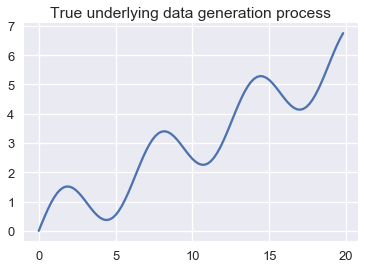

In [4]:
# HIDDEN
plt.plot(population_x, population_y)
plt.title('True underlying data generation process');

If we randomly draw a dataset from the population, we may end up with the following:

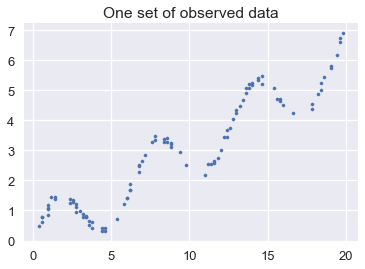

In [5]:
# HIDDEN
xs, ys = draw(100)
plt.scatter(xs, ys, s=10)
plt.title('One set of observed data');

Suppose we draw many sets of data from the population and fit a simple linear model to each one. Below, we plot the population data generation scheme in blue and the model predictions in green.

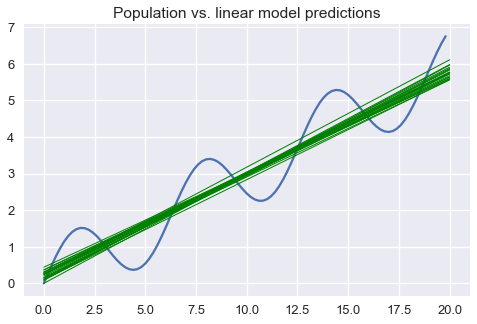

In [6]:
# HIDDEN
plt.figure(figsize=(8, 5))
plt.plot(population_x, population_y)

for x_start, x_end, y_start, y_end in random_lines:
    plt.plot([x_start, x_end], [y_start, y_end], linewidth=1, c='g')

plt.title('Population vs. linear model predictions');

The plot above clearly shows that a linear model will make prediction errors for this population. We may decompose the prediction errors into bias, variance, and irreducible noise. We illustrate bias of our model by showing that the long-run average linear model will predict different outcomes than the population process:

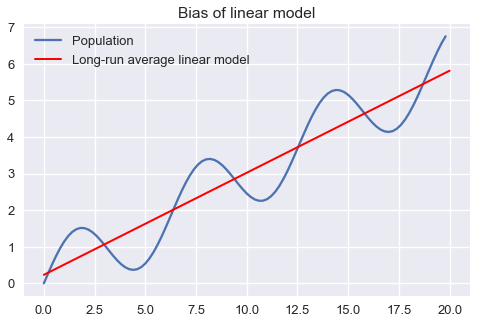

In [7]:
plt.figure(figsize=(8, 5))
xs = np.arange(0, 20, 0.2)
plt.plot(population_x, population_y, label='Population')

plt.plot([avg_line.x_start, avg_line.x_end],
         [avg_line.y_start, avg_line.y_end],
         linewidth=2, c='r',
         label='Long-run average linear model')
plt.title('Bias of linear model')
plt.legend();

The variance of our model is the variation of the model predictions around the long-run average model:

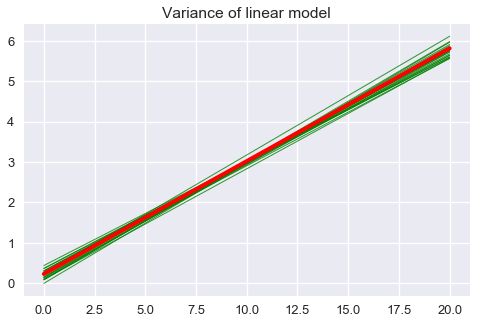

In [8]:
plt.figure(figsize=(8, 5))
for x_start, x_end, y_start, y_end in random_lines:
    plt.plot([x_start, x_end], [y_start, y_end], linewidth=1, c='g', alpha=0.8)
    
plt.plot([avg_line.x_start, avg_line.x_end],
         [avg_line.y_start, avg_line.y_end],
         linewidth=4, c='r')

plt.title('Variance of linear model');

Finally, we illustrate the irreducible error by showing the deviations of the observed points from the underlying population process.

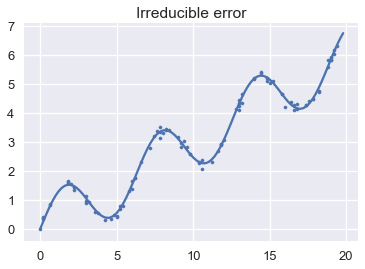

In [9]:
# HIDDEN
plt.plot(population_x, population_y)


xs, ys = draw(100)
plt.scatter(xs, ys, s=10)
plt.title('Irreducible error');

## Bias-Variance In Practice

In an ideal world, we would minimize the expected prediction error for our model over all input-output points in the population.  However, in practice, we do not know the population data generation process and thus are unable to precisely determine a model's bias, variance, or irreducible error. Instead, we use our observed dataset as an approximation to the population. 

As we have seen, however, achieving a low training error does not necessarily mean that our model will have a low test error as well. It is easy to obtain a model with extremely low bias and therefore low training error by fitting a curve that passes through every training observation. However, this model will have high variance, which generally leads to high test error. Conversely, you can obtain a model with very low variance by fitting a horizontal line to the data, but this leads to high bias. Fundamentally, this occurs because training error reflects the bias of our model but not the variance; the test error reflects both. In order to minimize test error, our model needs to simultaneously achieve low bias and low variance. To account for this, we need a way to simulate test error without using the test set. This is generally done using cross validation.

Cross-validation provides a more accurate method of estimating our model error using a single observed dataset by separating data used for training from the data used for model selection and final accuracy. Intuitively, the validation or test error checks the model's performance on a previously unseen dataset and thus allows us to estimate both bias and variance. Cross validation also allows us to incoporate the fact that the noise in the training set only affects the noise term in the risk, whereas the noise in the training set only affects bias and model variance. To choose the final model to use, we select the one that has the lowest validation error.

The simplest form of cross-validation is the **train-validation split**. However, this method is prone to high variance because the evaluation of the error may depend heavily on which points end up in the training and validation sets. To tackle this problem, we can run the train-validation split multiple times on the same dataset using  **k-fold cross-validation**. The biggest advantage of this method is that every data point is used for validation exactly once and for training *k-1* times. Typically, a *k* between 5 to 10 is used, but *k* remains an unfixed parameter. When *k* is small, the error estimate has a lower variance (many validation points) but has a higher bias (fewer training points). Vice versa, with large *k* the error estimate will have lower bias, but have higher variance. K-fold cross-validation outputs a prediction error that more accurately reflects the bias and variance of a model. The model bias is the validation error. If this value is low, our model predicts values with low error on average. The model variance can be estimated by taking the standard error of the errors in each of the *k* trials. If this value is high, our model's performance varies a lot with the dataset used for training. 



## Takeaways

The bias-variance tradeoff allows us to more precisely describe the modeling phenomena that we have seen thus far.

Underfitting is typically caused by too much bias; overfitting is typically caused by too much model variance.

Collecting more data reduces variance. For example, the model variance of linear regression goes down by a factor of $ 1
/n $, where $ n $ is the number of data points. Thus, doubling the dataset size halves the model variance, and collecting many data points will cause the variance to approach 0. One recent trend is to select a model with low bias and high intrinsic variance (e.g. a neural network) and collect many data points so that the model variance is low enough to make accurate predictions. While effective in practice, collecting enough data for these models tends to require large amounts of time and money.

Collecting more data reduces bias if the model can fit the population process exactly. If the model is inherently incapable of modeling the population (as in the example above), even infinite data cannot get rid of model bias.

Adding a useful feature to the data, such as a quadratic feature when the underlying process is quadratic, reduces bias. Adding a useless feature rarely increases bias.

Adding a feature, whether useful or not, typically increases model variance since each new feature adds a parameter to the model. Generally speaking, models with many parameters have many possible combinations of parameters and therefore have higher variance than models with few parameters. In order to increase a model's prediction accuracy, a new feature should decrease bias more than it increases variance. 

Removing features will typically increase bias and can cause underfitting. For example, a simple linear model has higher model bias than the same model with a quadratic feature added to it. If the data were generated from a quadratic phenomenon, the simple linear model underfits the data.

In the plot below, the X-axis measures model complexity and the Y-axis measures magnitude. Notice  how as model complexity increases, model bias strictly decreases and model variance strictly increases. As we choose more complex models, the test error first decreases then increases as the increased model variance outweighs the decreased model bias.

![bias_modeling_bias_var_plot.png](https://raw.githubusercontent.com/DS-100/textbook/master/assets/bias_modeling_bias_var_plot.png)

As the plot shows, a model with high complexity can achieve low training error but can fail to generalize to the test set because of its high model variance. On the other hand, a model with low complexity will have low model variance but can also fail to generalize because of its high model bias. To select a useful model, we must strike a balance between model bias and variance.

As we add more data, we shift the curves on our plot to the right and down, reducing bias and variance:

![bias_modeling_bias_var_shiftt.png](https://raw.githubusercontent.com/DS-100/textbook/master/assets/bias_modeling_bias_var_shift.png)

## Summary

The bias-variance tradeoff reveals a fundamental problem in modeling. In order to minimize model risk, we use a combination of feature engineering, model selection, and cross-validation to balance bias and variance.